# Wine Quality Regression

Import datasets

In [75]:
import pandas as pd
import numpy as np

red_wine = pd.read_csv('C:/Users/terry/Documents/ML Book/datasets/winequality-red.csv')
white_wine = pd.read_csv('C:/Users/terry/Documents/ML Book/datasets/winequality-white.csv')

In [2]:
display(red_wine.head())
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Merge Datasets

In [3]:
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine = pd.concat([red_wine, white_wine], ignore_index=True)

Explore the Data

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [5]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


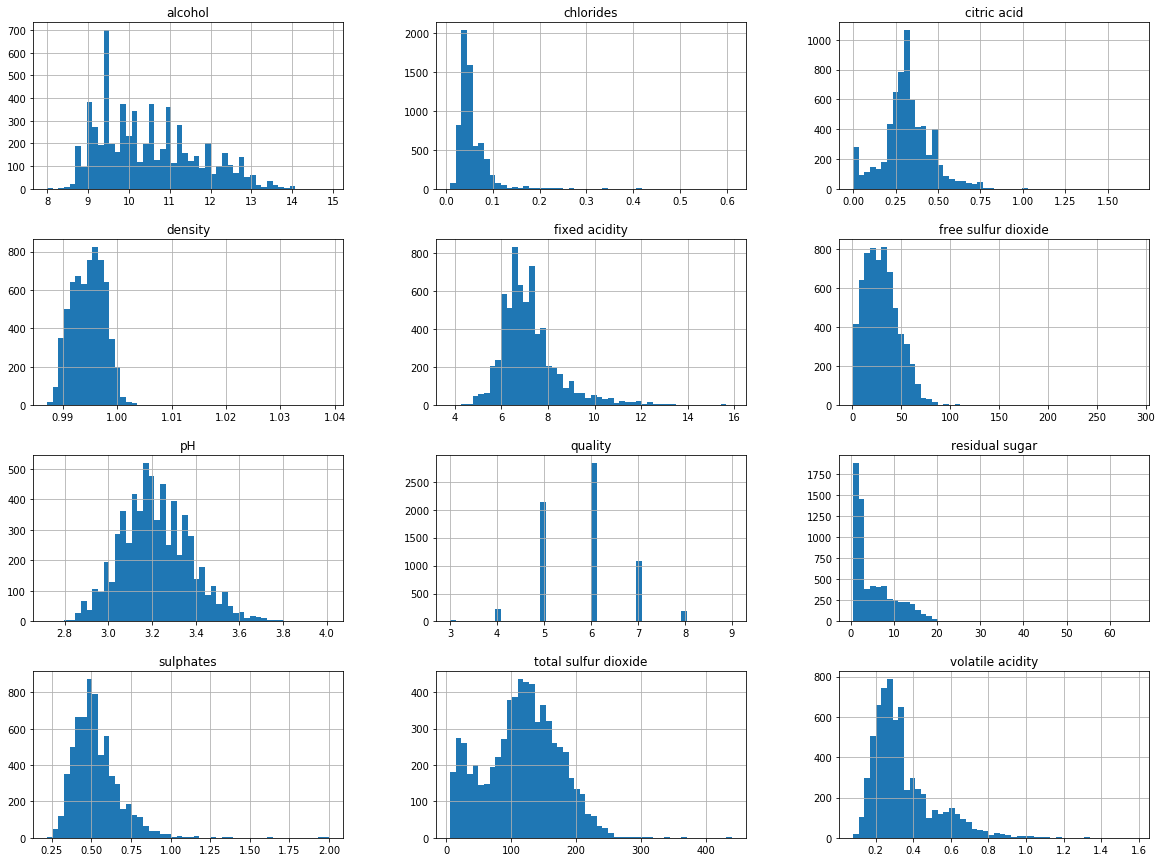

In [8]:
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
plt.show()

Create Test Set With Stratified Sampling

In [9]:
#Stratify on wine type to ensure the distribution is preserved in the train/test set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine, wine['type']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]
    
display(wine['type'].value_counts() / len(wine))
display(strat_test_set['type'].value_counts() / len(strat_test_set))

In [21]:
#Set aside the test set and work with the training set
wine = strat_train_set.copy()

Investigate Feature Relationships

In [23]:
#Correlation Matrix
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.439721
citric acid             0.094858
free sulfur dioxide     0.058149
sulphates               0.042451
pH                      0.010482
residual sugar         -0.034396
total sulfur dioxide   -0.038126
fixed acidity          -0.079541
chlorides              -0.199640
volatile acidity       -0.264985
density                -0.305457
Name: quality, dtype: float64

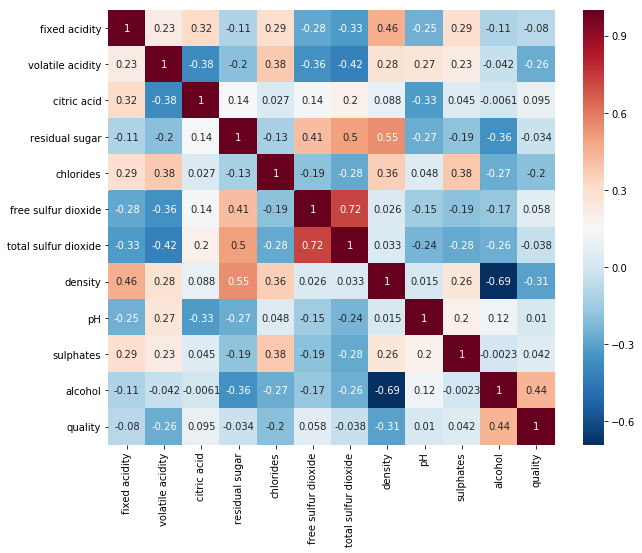

In [41]:
#Heat Map
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')

Pipeline

In [100]:
#create clean dataset
wine = strat_train_set.drop('quality', axis=1)
wine_labels = strat_train_set['quality'].copy()

In [101]:
#Process the data with a numerical and categorical pipeline
#The numerical pipeline fills missing values and scales the features
#The categorical pipeline encodes categorical features and does feature engineering

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attribs = list(wine)
num_attribs.remove('type')
cat_attribs = ['type']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

wine_prepared = full_pipeline.fit_transform(wine)
pd.DataFrame(wine_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.780839,-0.235499,1.194170,1.229111,0.054220,2.108751,1.749101,0.623768,-0.174702,0.465371,-0.912111,0.0,1.0
1,0.833361,-0.903661,1.194170,-0.887164,-0.142398,-1.098649,0.374488,-0.953600,-0.986520,-0.480979,0.427280,0.0,1.0
2,1.140827,-0.235499,0.150449,-0.125305,-1.069314,-0.423407,0.198256,0.020657,-0.611835,-0.278190,0.594703,0.0,1.0
3,-0.012173,0.007469,0.011287,-0.612048,0.953048,0.701997,-0.048470,0.637023,0.637117,1.749702,0.510992,1.0,0.0
4,0.218427,-0.417725,0.150449,-0.654374,-0.170487,-1.492540,-1.898910,0.139954,1.136697,0.735756,0.427280,1.0,0.0


Machine Learning Models

In [105]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

#display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.70788141 0.7665358  0.71151298 0.74536334 0.77193421 0.79595086
 0.68797224 0.73543734 0.72123207 0.75209926]
Mean: 0.7395919512167779
Standard deviation: 0.031545186212599316


In [106]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg_scores = cross_val_score(tree_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_rmse_scores)

Scores: [0.87266171 0.88578518 0.8814324  0.86713498 0.98839419 0.9029865
 0.81335015 0.86574725 0.88337241 0.82237496]
Mean: 0.878323973648158
Standard deviation: 0.045256856133388555


In [107]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg_scores = cross_val_score(forest_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_rmse_scores)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Scores: [0.64306956 0.70435459 0.62189227 0.65057667 0.64056766 0.69098592
 0.65384955 0.63787037 0.62811459 0.66428283]
Mean: 0.6535564003919981
Standard deviation: 0.02506008956166538


In [113]:
#Grid Search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(wine_prepared, wine_labels)
display(grid_search.best_params_)
display(np.sqrt(-grid_search.best_score_))

{'max_features': 4, 'n_estimators': 30}

0.6209317168185504

In [116]:
#Feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
col_names = num_attribs + cat_attribs
sorted(zip(feature_importance, col_names), reverse=True)

[(0.18428133980049285, 'alcohol'),
 (0.1147461391859091, 'volatile acidity'),
 (0.10832396386743372, 'density'),
 (0.08498898320516249, 'free sulfur dioxide'),
 (0.07910179815069839, 'residual sugar'),
 (0.07715830062785449, 'chlorides'),
 (0.07373085678695218, 'sulphates'),
 (0.07282563152397709, 'total sulfur dioxide'),
 (0.06909004479721871, 'citric acid'),
 (0.06889983325890804, 'pH'),
 (0.06038378546365979, 'fixed acidity'),
 (0.003380091643995128, 'type')]

In [122]:
#Evaluate model on Test set
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('quality', axis=1)
y_test = strat_test_set['quality'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.575135064033086